#Edge Detection

##環境(Environment)
* 作業環境(notebook)&nbsp;: Google Colaboratory<br>
* 言語&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;(language) : Python3
* フレームワーク(deeplearning framework) :　Keras

##Model
###[VGG16](http://caffe.berkeleyvision.org/model_zoo.html)
<P align="center">
  <img src="https://miro.medium.com/max/1326/1*TXLNTCElPPHX4bcpa2Lavg.png"></img>
</P>

####分類LAYERであFULLY CONNECTED LAYERを新たに学習する。






In [0]:
# 파일이름 nodeD.tar
!ln -s "/content/drive/My Drive/Colab Notebooks/dataset/32px/class32_3cv2.tar" class.tar
import re
import tarfile,os
import sys
from PIL import Image 
try:
  tar = tarfile.open("class.tar")
  tar.extractall(path=".")
except Exception as e:
  print(e)
!ls -al 

##Data Set

###3 classes Customized Data
size :  32px * 32px
<br>
data数：
* trainingセット: 各クラスごと9000個
* &nbsp; &nbsp; &nbsp; testセット : 各クラスごと1000個
<br>

####3-node branch
<img src="https://user-images.githubusercontent.com/39483767/84501009-ae9ee980-acf0-11ea-8708-9fd22ee2d6c8.png"></img>
<br>
<br>
####4-node branch
<img src="https://user-images.githubusercontent.com/39483767/84501020-b5c5f780-acf0-11ea-9849-c8a01eb388ab.png"></img>
<br>
<br>
####edge
<img src="https://user-images.githubusercontent.com/39483767/84500980-a0e96400-acf0-11ea-841e-e9f69069490e.png"></img>

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'class/train'
validation_dir = 'class/test'
batch_size = 32
image_size = 32

# 学習に使われるデータ生成
train_datagen = ImageDataGenerator(
      rotation_range=180,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      )
 
# 検証に使われるデータ生成
validation_datagen = ImageDataGenerator()
 


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)


validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_num=len(train_generator.class_indices)

custom_labels = list(validation_generator.class_indices.keys())

Found 27000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers
import keras.backend as K

K.clear_session()

from keras.applications import VGG16
# load model
conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
conv_layers.summary()


for layer in conv_layers.layers:
    layer.trainable = False

model = models.Sequential()

# VGG16モデルのconvolution Layer追加
model.add(conv_layers)
 
# モデルのFully Connected部分を再構築
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(class_num, activation='softmax'))

model.summary()

vgg16_model_path = 'new_trained_from_vgg16_32px.h5'

model.save(vgg16_model_path)
model.save('/content/drive/My Drive/Colab Notebooks/nodeParams/0530/'+vgg16_model_path)

In [0]:
from keras.models import load_model

#　モデルロード
model = load_model(vgg16_model_path)

# モデルコンパイル
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# モデル学習
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# モデル保存
model.save(vgg16_model_path)

844/843 [==============================] - 21s 25ms/step - loss: 0.2024 - acc: 0.9443 - val_loss: 0.1503 - val_acc: 0.9673
Epoch 100/100
844/843 [==============================] - 21s 25ms/step - loss: 0.2065 - acc: 0.9421 - val_loss: 0.1151 - val_acc: 0.9660


In [0]:
from keras.models import load_model
# 保存されたモデルを使う場合
model= load_model('/content/drive/My Drive/Colab Notebooks/nodeParams/0530/new_trained_from_vgg16_32px.h5')


In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import vgg16
from IPython.display import display
import numpy as np

# 実行部分
def check_node_vgg16(model, filename, size) :

  image = load_img(filename)
  display(image)
  
  image = load_img(filename, target_size=(size, size))

  image = img_to_array(image)
  image = image.reshape((1, size, size, 3))
  
  image = vgg16.preprocess_input(image)
  print(type(image))
  
  yhat = model.predict(image)
  idx=np.argmax(yhat[0])

  print('%s (%.2f%%)' % (custom_labels[idx], yhat[0][idx]*100))
  return custom_labels[idx]

Using TensorFlow backend.


created part 


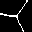

<class 'numpy.ndarray'>
node3 (52.07%)
created part 


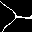

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


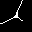

<class 'numpy.ndarray'>
node4 (96.95%)
created part 


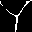

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


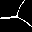

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


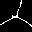

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


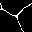

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


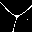

<class 'numpy.ndarray'>
node4 (99.97%)
created part 


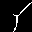

<class 'numpy.ndarray'>
node4 (99.83%)
created part 


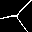

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


<class 'numpy.ndarray'>
edge2 (94.85%)
created part 


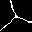

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


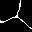

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


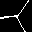

<class 'numpy.ndarray'>
node3 (99.99%)
created part 


<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


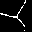

<class 'numpy.ndarray'>
node4 (99.99%)
created part 


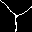

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


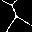

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


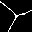

<class 'numpy.ndarray'>
node4 (99.95%)
created part 


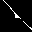

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


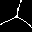

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


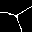

<class 'numpy.ndarray'>
node3 (96.47%)
created part 


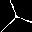

<class 'numpy.ndarray'>
node4 (89.48%)
created part 


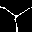

<class 'numpy.ndarray'>
node4 (99.58%)
created part 


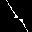

<class 'numpy.ndarray'>
node3 (81.55%)
created part 


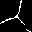

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


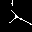

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


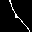

<class 'numpy.ndarray'>
node4 (78.81%)
created part 


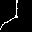

<class 'numpy.ndarray'>
node4 (99.98%)
created part 


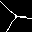

<class 'numpy.ndarray'>
node3 (78.20%)
created part 


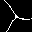

<class 'numpy.ndarray'>
node4 (95.76%)
created part 


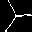

<class 'numpy.ndarray'>
node4 (56.08%)
created part 


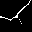

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


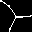

<class 'numpy.ndarray'>
node4 (78.55%)
created part 


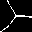

<class 'numpy.ndarray'>
node4 (99.72%)
created part 


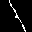

<class 'numpy.ndarray'>
edge2 (99.85%)
created part 


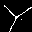

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


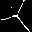

<class 'numpy.ndarray'>
node4 (99.91%)
created part 


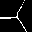

<class 'numpy.ndarray'>
node3 (84.08%)
created part 


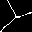

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


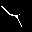

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


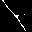

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


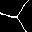

<class 'numpy.ndarray'>
node4 (99.03%)
created part 


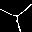

<class 'numpy.ndarray'>
node4 (50.60%)
created part 


<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


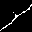

<class 'numpy.ndarray'>
node4 (52.98%)
created part 


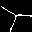

<class 'numpy.ndarray'>
node3 (84.00%)
created part 


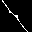

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


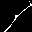

<class 'numpy.ndarray'>
edge2 (84.63%)
created part 


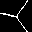

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


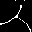

<class 'numpy.ndarray'>
node4 (99.98%)
created part 


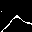

<class 'numpy.ndarray'>
edge2 (59.78%)
created part 


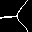

<class 'numpy.ndarray'>
node4 (98.78%)
created part 


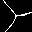

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


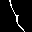

<class 'numpy.ndarray'>
node4 (99.97%)
created part 


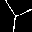

<class 'numpy.ndarray'>
node4 (99.17%)
created part 


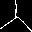

<class 'numpy.ndarray'>
node4 (99.98%)
created part 


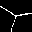

<class 'numpy.ndarray'>
node4 (95.23%)
created part 


<class 'numpy.ndarray'>
node4 (100.00%)
created part 


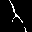

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


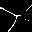

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


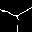

<class 'numpy.ndarray'>
node3 (88.57%)
created part 


<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


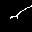

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


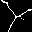

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


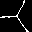

<class 'numpy.ndarray'>
node3 (99.79%)
created part 


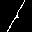

<class 'numpy.ndarray'>
node3 (97.88%)
created part 


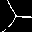

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


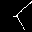

<class 'numpy.ndarray'>
node3 (96.58%)
created part 


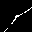

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


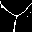

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


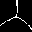

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


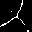

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


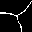

<class 'numpy.ndarray'>
node4 (58.81%)
created part 


<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


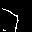

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


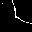

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


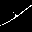

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


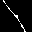

<class 'numpy.ndarray'>
node3 (79.88%)
created part 


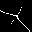

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


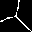

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


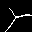

<class 'numpy.ndarray'>
node4 (99.90%)
created part 


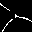

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


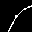

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


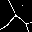

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


<class 'numpy.ndarray'>
edge2 (60.69%)
created part 


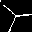

<class 'numpy.ndarray'>
node4 (99.89%)
created part 


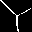

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


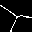

<class 'numpy.ndarray'>
node4 (94.66%)
created part 


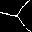

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


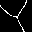

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


<class 'numpy.ndarray'>
node4 (100.00%)
created part 


<class 'numpy.ndarray'>
node4 (99.98%)
created part 


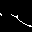

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


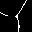

<class 'numpy.ndarray'>
node4 (94.88%)
created part 


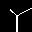

<class 'numpy.ndarray'>
node3 (67.33%)
created part 


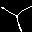

<class 'numpy.ndarray'>
node4 (98.21%)
created part 


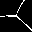

<class 'numpy.ndarray'>
node3 (72.34%)
created part 


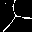

<class 'numpy.ndarray'>
node4 (99.99%)
created part 


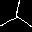

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


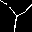

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


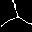

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


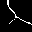

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


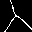

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


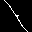

<class 'numpy.ndarray'>
node4 (99.02%)
created part 


<class 'numpy.ndarray'>
node4 (100.00%)
created part 


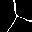

<class 'numpy.ndarray'>
node4 (99.38%)
created part 


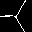

<class 'numpy.ndarray'>
node3 (99.18%)
created part 


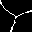

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


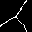

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


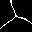

<class 'numpy.ndarray'>
node4 (99.91%)
created part 


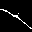

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


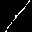

<class 'numpy.ndarray'>
edge2 (99.96%)
created part 


<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


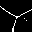

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


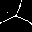

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


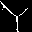

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


<class 'numpy.ndarray'>
edge2 (54.21%)
created part 


<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


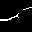

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


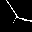

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


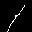

<class 'numpy.ndarray'>
edge2 (98.00%)
created part 


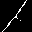

<class 'numpy.ndarray'>
node4 (75.42%)
created part 


<class 'numpy.ndarray'>
node4 (100.00%)
created part 


<class 'numpy.ndarray'>
node4 (87.29%)
created part 


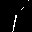

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


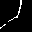

<class 'numpy.ndarray'>
node3 (99.75%)
created part 


<class 'numpy.ndarray'>
node4 (100.00%)
created part 


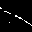

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


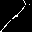

<class 'numpy.ndarray'>
node4 (99.65%)
created part 


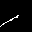

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


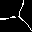

<class 'numpy.ndarray'>
node4 (97.23%)
created part 


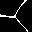

<class 'numpy.ndarray'>
node3 (99.72%)
created part 


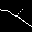

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


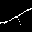

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


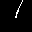

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


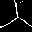

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


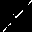

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


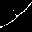

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


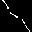

<class 'numpy.ndarray'>
edge2 (82.74%)
created part 


<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


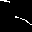

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


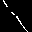

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


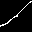

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


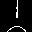

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


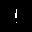

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


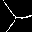

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


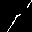

<class 'numpy.ndarray'>
edge2 (98.78%)
created part 


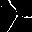

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


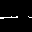

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


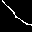

<class 'numpy.ndarray'>
node4 (99.72%)
created part 


<class 'numpy.ndarray'>
node4 (100.00%)
created part 


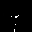

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


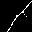

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


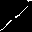

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


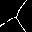

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


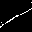

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


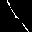

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


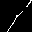

<class 'numpy.ndarray'>
node4 (88.88%)
created part 


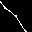

<class 'numpy.ndarray'>
node4 (99.83%)
created part 


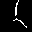

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


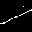

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


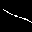

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


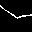

<class 'numpy.ndarray'>
edge2 (99.99%)
created part 


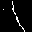

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


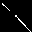

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


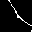

<class 'numpy.ndarray'>
node4 (99.94%)
created part 


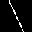

<class 'numpy.ndarray'>
edge2 (62.57%)
created part 


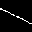

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


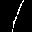

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


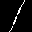

<class 'numpy.ndarray'>
edge2 (99.99%)
created part 


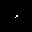

<class 'numpy.ndarray'>
node4 (52.98%)
created part 


<class 'numpy.ndarray'>
node4 (99.89%)
created part 


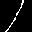

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


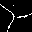

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


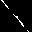

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


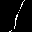

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


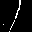

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


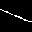

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


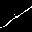

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


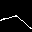

<class 'numpy.ndarray'>
node3 (98.97%)
created part 


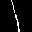

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


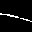

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


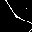

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


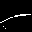

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


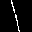

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


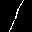

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


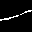

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


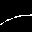

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


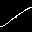

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


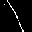

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


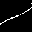

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


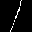

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


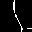

<class 'numpy.ndarray'>
node4 (55.10%)
created part 


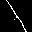

<class 'numpy.ndarray'>
node3 (98.04%)
created part 


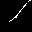

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


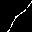

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


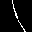

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


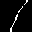

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


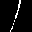

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


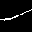

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


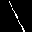

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


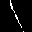

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


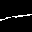

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


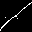

<class 'numpy.ndarray'>
node4 (99.62%)
created part 


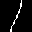

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


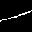

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


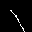

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


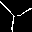

<class 'numpy.ndarray'>
node4 (99.40%)
created part 


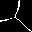

<class 'numpy.ndarray'>
node4 (96.18%)
created part 


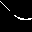

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


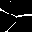

<class 'numpy.ndarray'>
node4 (99.99%)
created part 


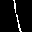

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


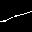

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


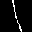

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


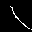

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


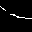

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


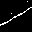

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


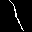

<class 'numpy.ndarray'>
node3 (44.64%)
created part 


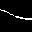

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


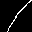

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


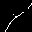

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


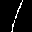

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


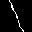

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


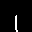

<class 'numpy.ndarray'>
edge2 (97.51%)
created part 


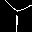

<class 'numpy.ndarray'>
node3 (99.96%)
created part 


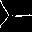

<class 'numpy.ndarray'>
node4 (99.99%)
created part 


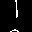

<class 'numpy.ndarray'>
edge2 (99.93%)
created part 


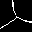

<class 'numpy.ndarray'>
node4 (99.84%)
created part 


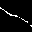

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


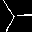

<class 'numpy.ndarray'>
node3 (52.50%)
created part 


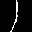

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


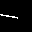

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


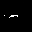

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


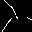

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


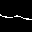

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


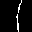

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


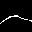

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


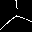

<class 'numpy.ndarray'>
node4 (99.99%)
created part 


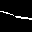

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


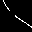

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


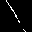

<class 'numpy.ndarray'>
node4 (43.81%)
created part 


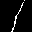

<class 'numpy.ndarray'>
node4 (99.97%)
created part 


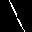

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


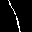

<class 'numpy.ndarray'>
node4 (81.26%)
created part 


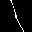

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


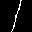

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


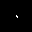

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


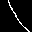

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


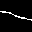

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


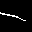

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


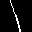

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


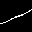

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


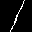

<class 'numpy.ndarray'>
edge2 (99.82%)
created part 


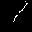

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


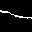

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


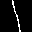

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


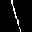

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


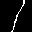

<class 'numpy.ndarray'>
node4 (99.70%)
created part 


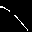

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


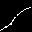

<class 'numpy.ndarray'>
edge2 (99.99%)
created part 


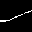

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


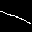

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


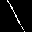

<class 'numpy.ndarray'>
edge2 (99.84%)
created part 


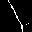

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


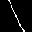

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


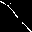

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


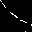

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


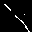

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


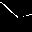

<class 'numpy.ndarray'>
node4 (99.85%)
created part 


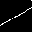

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


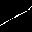

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


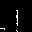

<class 'numpy.ndarray'>
node4 (99.71%)
created part 


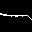

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


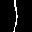

<class 'numpy.ndarray'>
node4 (51.38%)
created part 


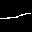

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


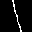

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


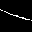

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


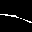

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


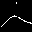

<class 'numpy.ndarray'>
node4 (100.00%)
created part 


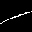

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


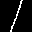

<class 'numpy.ndarray'>
edge2 (100.00%)
created part 


<class 'numpy.ndarray'>
node4 (100.00%)


In [0]:
import numpy as np
import cv2 as cv
import os
import csv
# 保存されたモデルを使う場合
custom_labels = ["edge2", "node3", "node4"]
filename = 'cell3' # input image
ext = '.png'

img = cv.imread(filename + ext )
# 635 * 825(h * w)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv.cornerHarris(gray, 5, 3, 0.04)


dst_norm = np.empty(dst.shape, dtype=np.float32)
cv.normalize(dst, dst_norm, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)

# thresh = 200
thresh = 70

infoData = np.array([0, 0, 0])
for i in range(dst_norm.shape[0]):
        for j in range(dst_norm.shape[1]):
            if int(dst_norm[i,j]) > thresh:
                tmp = np.array([i,j, dst_norm[i,j]])
                infoData = np.vstack((infoData, tmp))

infoData = np.delete(infoData, (0), axis = 0)
infoData = infoData[np.argsort(infoData[:, 2])][::-1] # row, column, value

numNodeCandidates = 5000
infoData = np.delete(infoData, np.s_[numNodeCandidates::], 0)


img = cv.imread(filename + ext)

final_process_node = []
for i in infoData:
    # print(i)
    # [622. 706. 255.]
    
    # search 
    line_width = 15
    
    if len(final_process_node):
        check = True
        for item_node in final_process_node:
            # direct to y axis
            if item_node[0] - line_width <= i[0] and item_node[0] + line_width >= i[0]:
                if item_node[1] - line_width <= i[1] and item_node[1] + line_width >= i[1]:
                    check = False
                    break
        if check:
            final_process_node.append(i)

    else:
        final_process_node.append(i)

num = 0
final_node = []

with open('node.csv', 'w') as f:
  for i in final_process_node:
      
      width = 32
      height = 32
      point_y = int(i[0])
      point_x = int(i[1])
      # 32px
      range_y_1st = max(0, point_y - int(width/2))
      range_y_2nd = min(int(width/2) + point_y, img.shape[0])
      range_x_1st = max(0, point_x - int(width/2))
      range_x_2nd = min(int(width/2) + point_x, img.shape[1])
      new_img = img[range_y_1st : range_y_2nd,range_x_1st : range_x_2nd]

      if not os.path.exists('result/'+filename):
          os.mkdir('result/'+filename)
      cv.imwrite('result/'+filename+'/part%s.png'%(num,), new_img)
      # cv.imwrite('result/'+filename+'/part%s_64px.png'%(num,), new_img_64)
      print("created part ")
      # 分類 32px filter
      check_node_px32 = check_node_vgg16(model, 'result/'+filename+'/part%s.png'%(num,), 32)  

      if 'node' in check_node_px32 :
          final_node.append(i)
          writer = csv.writer(f, lineterminator='\n') # 改行コード（\n）を指定しておく
          writer.writerow((i[0],i[1]))     # list（1次元配列）の場合

      num +=1

  background = np.zeros(img.shape, np.uint8)
  for i in final_node:
      # img[int(i[0])][int(i[1])][0] = 0
      # img[int(i[0])][int(i[1])][1] = 0
      # img[int(i[0])][int(i[1])][2] = 255
      for j in range(-3,3):
          tmp_x = min(j+int(i[1]), img.shape[1] - 1 )
          for k in range(-3,3):
              tmp_y = min(k+int(i[0]), img.shape[0] - 1)
              background[tmp_y][tmp_x][0] = 255
              background[tmp_y][tmp_x][1] = 255
              background[tmp_y][tmp_x][2] = 255
              img[tmp_y][tmp_x][0] = 0
              img[tmp_y][tmp_x][1] = 0
              img[tmp_y][tmp_x][2] = 255
              
  cv.imwrite('result/'+filename+"_dotOnly"+ext, background)
  cv.imwrite('result/'+filename+"_reddot"+ext, img)

    
            



    